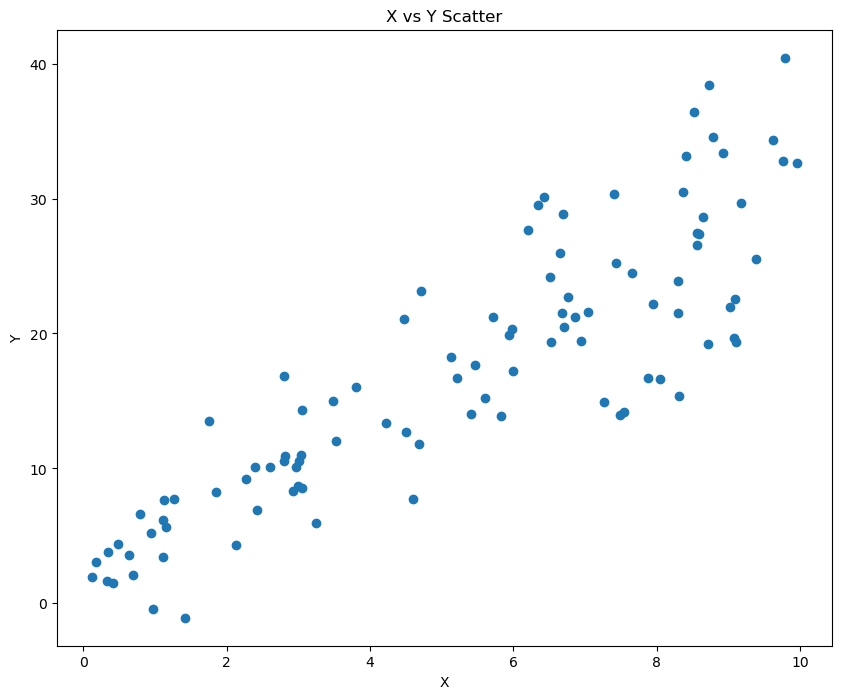

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/dataset_10.csv')

plt.figure(figsize=(10, 8))
plt.scatter(df['X'], df['Y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('X vs Y Scatter')
plt.show()

In [112]:
import statsmodels.api as sm

X_sm = sm.add_constant(df['X'])
model = sm.OLS(df['Y'], X_sm).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     320.6
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.16e-32
Time:                        11:17:09   Log-Likelihood:                -297.79
No. Observations:                 100   AIC:                             599.6
Df Residuals:                      98   BIC:                             604.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9966      0.973      2.051      0.0

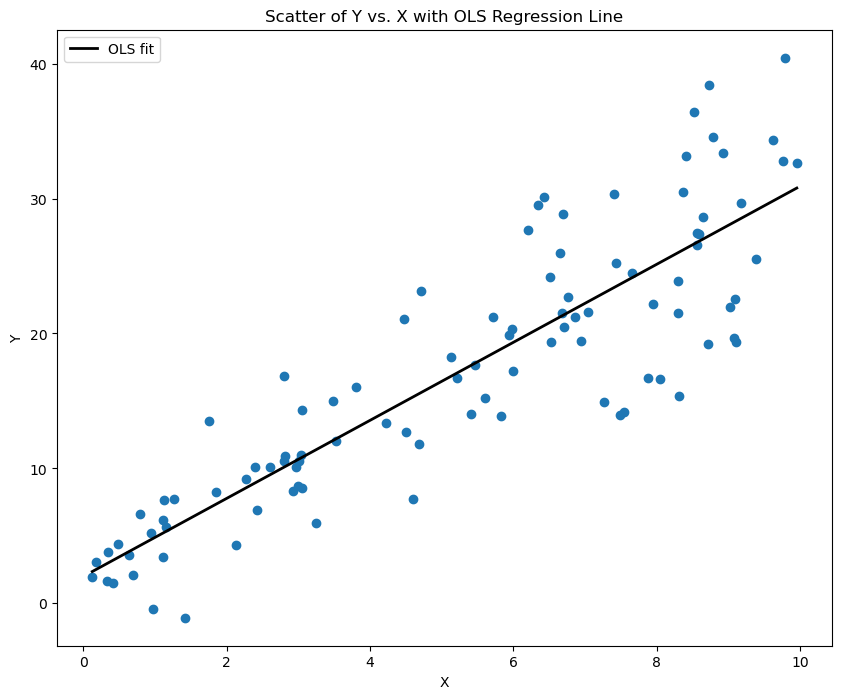

In [113]:
plt.figure(figsize=(10, 8))
plt.scatter(df['X'], df['Y'])

x_val = np.linspace(df["X"].min(), df['X'].max(), 100)
y_val = model.params['const'] + model.params['X'] * x_val

plt.plot(x_val, y_val, color='black', lw=2, label='OLS fit')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter of Y vs. X with OLS Regression Line')
plt.legend()
plt.show()

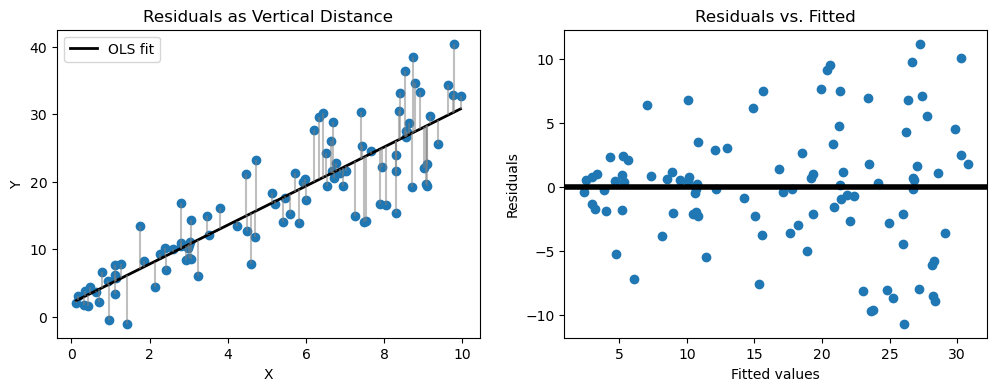

In [114]:
x_val = np.linspace(df["X"].min(), df['X'].max(), 100)
y_val = model.params['const'] + model.params['X'] * x_val

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].scatter(df['X'], df['Y'])
axes[0].plot(x_val, y_val, color='black', lw=2, label='OLS fit')
for xi, yi, fi in zip(df['X'], df['Y'], model.fittedvalues):
    axes[0].vlines(xi, yi, fi, color='gray', alpha=0.5)
axes[0].set_title('Residuals as Vertical Distance')
axes[0].set_xlabel('X')
axes[0].set_ylabel('Y')
axes[0].legend()

axes[1].scatter(model.fittedvalues, model.resid)
axes[1].axhline(0, color='black', lw=4)
axes[1].set_title('Residuals vs. Fitted')
axes[1].set_xlabel('Fitted values')
axes[1].set_ylabel('Residuals')

plt.show()

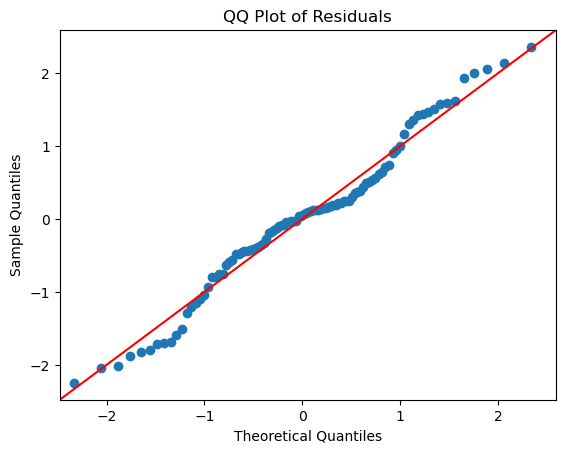

In [115]:
from scipy.stats import norm

residuals = model.resid
n = len(residuals)

sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()

In [116]:
n_boot = 1000
boot_params = np.zeros((n_boot, 2))

for i in range(n_boot):
    idx = np.random.choice(df.index, size=n, replace=True)
    xb = sm.add_constant(df.loc[idx, 'X'])
    yb = df.loc[idx, 'Y']
    res = sm.OLS(yb, xb).fit()
    boot_params[i] = res.params.values

ci_int = np.percentile(boot_params[:,0], [2.5, 97.5])
ci_slope = np.percentile(boot_params[:,1], [2.5, 97.5])

print(f"95% CI for intercept: {ci_int}")
print(f"95% CI for slope:     {ci_slope}")

95% CI for intercept: [0.68847812 3.29293604]
95% CI for slope:     [2.58044321 3.19459281]


In [110]:
if ci_slope[0] <= 0 <= ci_slope[1]:
    print('There is not an association, fail to reject H0')
else:
    print('There is an association, reject H0')

There is an association, reject H0


### Simple Analysis

1. There is likely a positive linear relationship between X and Y, with an association, predicted slope 3.3579 

2. There is likely a positive linear relationship between X and Y, with an association, predicted slope 3.1392 

3. There is likely a positive linear relationship between X and Y, with an association, predicted slope 2.9610

4. There is likely a positive linear relationship between X and Y, with an association, predicted slope 3.3579 

5. There is likely a positive linear relationship between X and Y, with an association, predicted slope 2.9591 

6. There is likely a positive linear relationship between X and Y, with an association, predicted slope 2.9562

7. There is likely a positive linear relationship between X and Y, with an association, predicted slope 3.2326  

8. QQ Plot no good, predicted slope  4.1172 

9. QQ Plot no good, predicted slope  3.1145 

10. There is a pattern to residual plot, cannot use linear